In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import sys, os
sys.path.append(os.path.abspath('..'))

folder = '../../data/processed_data/extended_data_figure_10/modelfree'
datapaths = np.sort([os.path.join(folder, name) for name in os.listdir(folder) if ".npz" in name])

In [2]:
thresh=0.01
findr_vs_modelfree = []
random_vs_modelfree = []

for ii in range(len(datapaths)):
    data = np.load(
        datapaths[ii]
    )

    modelfree_u=data['modelfree_u']
    modelfree_v=data['modelfree_v']
    findr_u=data['findr_u']
    findr_v=data['findr_v']
    auto_modelfree=data['auto_modelfree']
    auto_findr=data['auto_findr']
    
    uvgrid_modelfree = np.zeros(modelfree_u.shape)
    for i in range(uvgrid_modelfree.shape[0]):
        for j in range(uvgrid_modelfree.shape[1]):
            uv = np.sum(
                auto_modelfree[i, j, :, :].flatten()
            )
            uvgrid_modelfree[i, j] = uv/np.sum(auto_modelfree)
    
    # S_c(FINDR, model-free)
    xvec = np.vstack([findr_u[(uvgrid_modelfree>thresh)], findr_v[(uvgrid_modelfree>thresh)]])
    yvec = np.vstack([modelfree_u[(uvgrid_modelfree>thresh)], modelfree_v[(uvgrid_modelfree>thresh)]])
    dot_product = np.sum(xvec * yvec, axis=0)
    magnitude1 = np.linalg.norm(xvec, axis=0)
    magnitude2 = np.linalg.norm(yvec, axis=0)
    findr_vs_modelfree.append(
        np.nanmean( dot_product / (magnitude1 * magnitude2) )
    )

    # S_c(random, model-free)
    for sample in range(1000):
        theta = np.random.uniform(low=0., high=2*np.pi, size=64)
        u_shuff = np.reshape(np.cos(theta), modelfree_u.shape)
        v_shuff = np.reshape(np.sin(theta), modelfree_u.shape)
        xvec = np.vstack([u_shuff[(uvgrid_modelfree>thresh)], v_shuff[(uvgrid_modelfree>thresh)]])
        yvec = np.vstack([modelfree_u[(uvgrid_modelfree>thresh)], modelfree_v[(uvgrid_modelfree>thresh)]])
        dot_product = np.sum(xvec * yvec, axis=0)
        magnitude1 = np.linalg.norm(xvec, axis=0)
        magnitude2 = np.linalg.norm(yvec, axis=0)
        random_vs_modelfree.append(
            np.nanmean( dot_product / (magnitude1 * magnitude2) )
        )

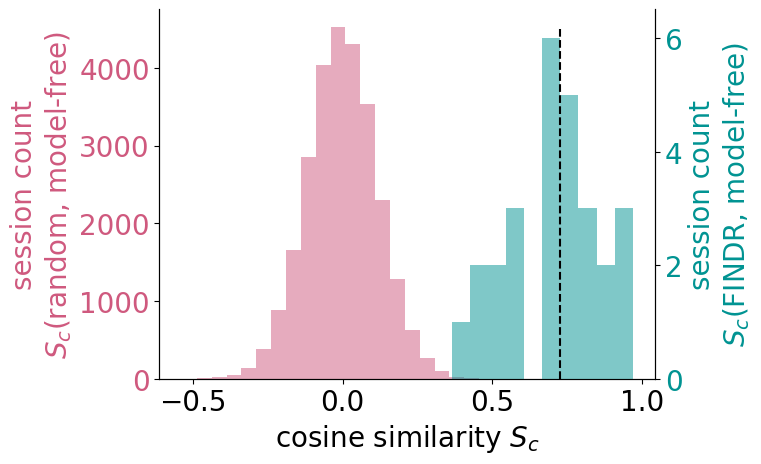

In [3]:
# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first histogram
ax1.hist(random_vs_modelfree, bins=20, color='#CF597E', alpha=0.5)
ax1.tick_params(axis='y', labelcolor='#CF597E')

ax1.set_xlabel("cosine similarity $S_c$", fontsize=20)
ax1.set_ylabel('session count\n$S_c$(random, model-free)', color='#CF597E', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax1.spines['top'].set_visible(False)

# Create the second axis
ax2 = ax1.twinx()

# Plot the second histogram
ax2.hist(findr_vs_modelfree, bins=10, color='#009392', alpha=0.5)
ax2.set_ylabel('session count\n$S_c$(FINDR, model-free)', color='#009392', fontsize=20)
ax2.tick_params(axis='y', labelcolor='#009392')
ax2.vlines(x=np.median(findr_vs_modelfree), ymin=0, ymax=6.2, linestyles='--', colors='black')

ax2.set_xlabel("cosine similarity $S_c$", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax2.spines['top'].set_visible(False)

# Session 1 (T240_2020_10_22)

In [4]:
data=np.load('../../data/processed_data/extended_data_figure_10/modelfree/modelfree_T240_2020_10_22.npz')
modelfree_u=data['modelfree_u']
modelfree_v=data['modelfree_v']
findr_u=data['findr_u']
findr_v=data['findr_v']
auto_modelfree=data['auto_modelfree']
auto_findr=data['auto_findr']
findr_z_pc_=data['findr_z_pc_']
modelfree_z_pc_=data['modelfree_z_pc_']

uvgrid_modelfree = np.zeros(modelfree_u.shape)
for i in range(uvgrid_modelfree.shape[0]):
    for j in range(uvgrid_modelfree.shape[1]):
        uv = np.sum(
            auto_modelfree[i, j, :, :].flatten()
        )
        uvgrid_modelfree[i, j] = uv/np.sum(auto_modelfree)

uvgrid_findr = np.zeros(findr_u.shape)
for i in range(uvgrid_findr.shape[0]):
    for j in range(uvgrid_findr.shape[1]):
        uv = np.sum(
            auto_findr[i, j, :, :].flatten()
        )
        uvgrid_findr[i, j] = uv/np.sum(auto_findr)

## Plot FINDR vector field

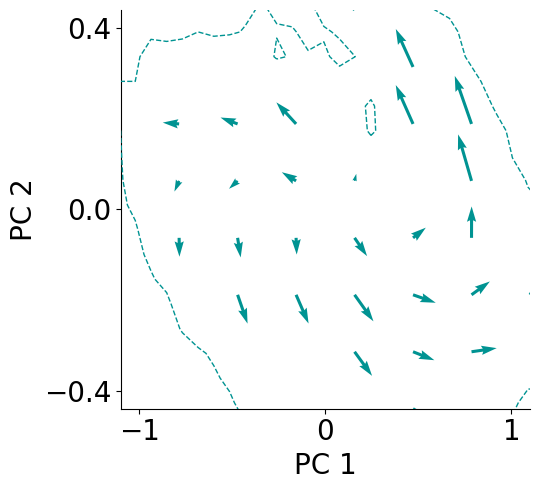

In [5]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))

flip_horizontally=1
flip_vertically=1

xrange = (np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.44*xrange, 0.44*xrange, num=resolution)
)

findr_u[uvgrid_findr<=thresh] = np.nan
findr_v[uvgrid_findr<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * findr_u, 
    flip_vertically * findr_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * findr_z_pc_[:,0], 
    flip_vertically * findr_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [5,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.4, 0, 0.4])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.44, 0.44])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

## Plot model-free vector field

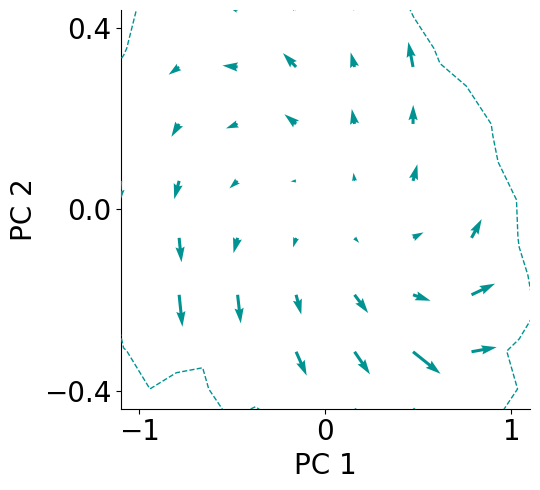

In [6]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))

flip_horizontally=1
flip_vertically=1

xrange = (np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.44*xrange, 0.44*xrange, num=resolution)
)

modelfree_u[uvgrid_modelfree<=thresh] = np.nan
modelfree_v[uvgrid_modelfree<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * modelfree_u, 
    flip_vertically * modelfree_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * modelfree_z_pc_[:,0], 
    flip_vertically * modelfree_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [60,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.4, 0, 0.4])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.44, 0.44])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Session 2 (T176_2018_06_08)

In [7]:
data=np.load('../../data/processed_data/extended_data_figure_10/modelfree/modelfree_T176_2018_06_08.npz')
modelfree_u=data['modelfree_u']
modelfree_v=data['modelfree_v']
findr_u=data['findr_u']
findr_v=data['findr_v']
auto_modelfree=data['auto_modelfree']
auto_findr=data['auto_findr']
findr_z_pc_=data['findr_z_pc_']
modelfree_z_pc_=data['modelfree_z_pc_']

uvgrid_modelfree = np.zeros(modelfree_u.shape)
for i in range(uvgrid_modelfree.shape[0]):
    for j in range(uvgrid_modelfree.shape[1]):
        uv = np.sum(
            auto_modelfree[i, j, :, :].flatten()
        )
        uvgrid_modelfree[i, j] = uv/np.sum(auto_modelfree)

uvgrid_findr = np.zeros(findr_u.shape)
for i in range(uvgrid_findr.shape[0]):
    for j in range(uvgrid_findr.shape[1]):
        uv = np.sum(
            auto_findr[i, j, :, :].flatten()
        )
        uvgrid_findr[i, j] = uv/np.sum(auto_findr)

## Plot FINDR vector field

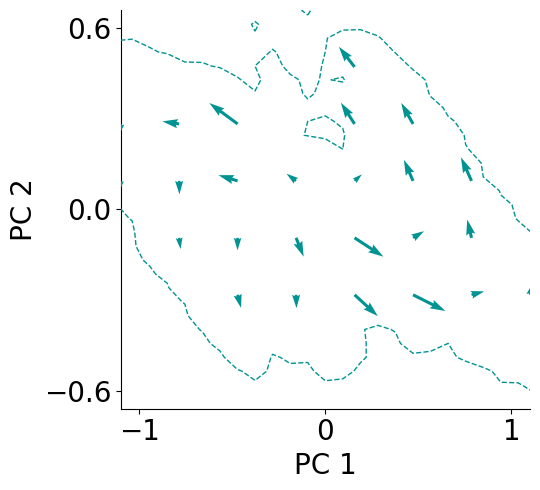

In [8]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))
flip_horizontally=1
flip_vertically=1

xrange = (np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.66*xrange, 0.66*xrange, num=resolution)
)

findr_u[uvgrid_findr<=thresh] = np.nan
findr_v[uvgrid_findr<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * findr_u, 
    flip_vertically * findr_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * findr_z_pc_[:,0], 
    flip_vertically * findr_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [5,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.6, 0, 0.6])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.66, 0.66])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

## Plot model-free vector field

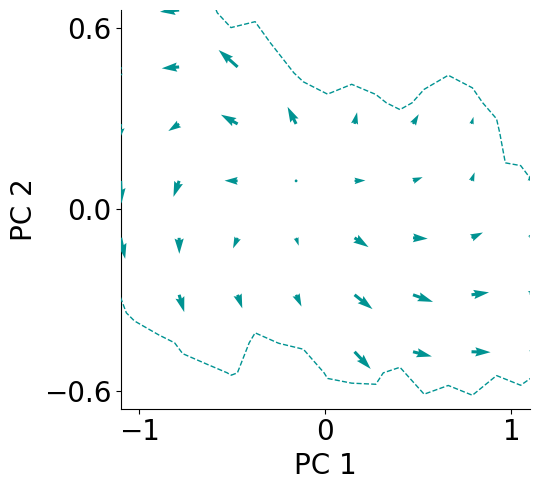

In [9]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))
flip_horizontally=1
flip_vertically=1

xrange = (np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.66*xrange, 0.66*xrange, num=resolution)
)

modelfree_u[uvgrid_modelfree<=thresh] = np.nan
modelfree_v[uvgrid_modelfree<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * modelfree_u, 
    flip_vertically * modelfree_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * modelfree_z_pc_[:,0], 
    flip_vertically * modelfree_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [70,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.6, 0, 0.6])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.66, 0.66])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Session 3 (T176_2018_05_28)

In [10]:
data=np.load('../../data/processed_data/extended_data_figure_10/modelfree/modelfree_T176_2018_05_28.npz')
modelfree_u=data['modelfree_u']
modelfree_v=data['modelfree_v']
findr_u=data['findr_u']
findr_v=data['findr_v']
auto_modelfree=data['auto_modelfree']
auto_findr=data['auto_findr']
findr_z_pc_=data['findr_z_pc_']
modelfree_z_pc_=data['modelfree_z_pc_']

uvgrid_modelfree = np.zeros(modelfree_u.shape)
for i in range(uvgrid_modelfree.shape[0]):
    for j in range(uvgrid_modelfree.shape[1]):
        uv = np.sum(
            auto_modelfree[i, j, :, :].flatten()
        )
        uvgrid_modelfree[i, j] = uv/np.sum(auto_modelfree)

uvgrid_findr = np.zeros(findr_u.shape)
for i in range(uvgrid_findr.shape[0]):
    for j in range(uvgrid_findr.shape[1]):
        uv = np.sum(
            auto_findr[i, j, :, :].flatten()
        )
        uvgrid_findr[i, j] = uv/np.sum(auto_findr)

## Plot FINDR vector field

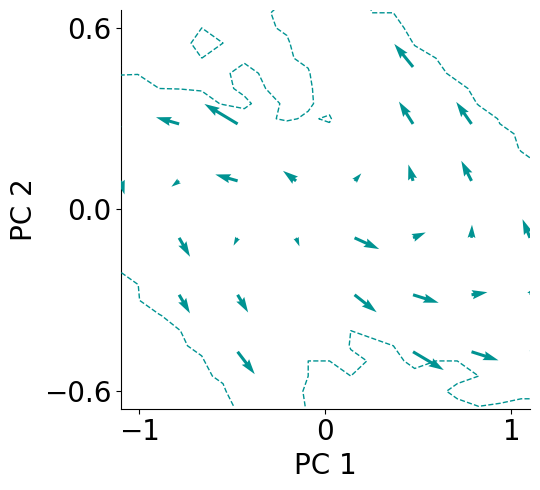

In [11]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))
flip_horizontally=-1
flip_vertically=1

xrange = (np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(findr_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.66*xrange, 0.66*xrange, num=resolution)
)

findr_u[uvgrid_findr<=thresh] = np.nan
findr_v[uvgrid_findr<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * findr_u, 
    flip_vertically * findr_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * findr_z_pc_[:,0], 
    flip_vertically * findr_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [1,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.6, 0, 0.6])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.66, 0.66])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

## Plot model-free vector field

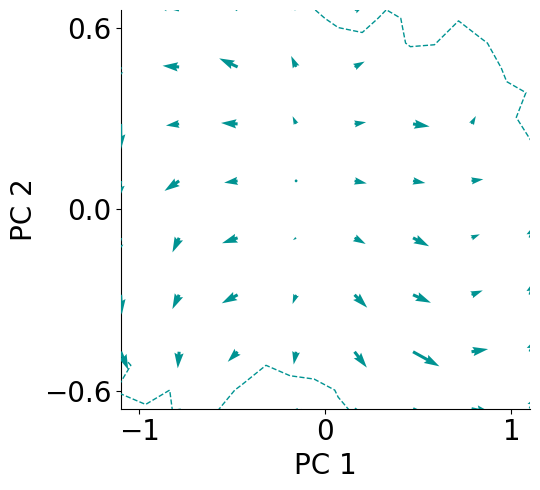

In [12]:
thresh=0.01
fig, ax = plt.subplots(figsize=(5.5, 5))
flip_horizontally=-1
flip_vertically=1

xrange = (np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.01)) + np.abs(np.quantile(modelfree_z_pc_[:,0].flatten(), 0.99)))/2
resolution = 8
ntimesteps = 100
x, y = np.meshgrid(
    np.linspace(-1.1*xrange, 1.1*xrange, num=resolution), 
    np.linspace(-0.66*xrange, 0.66*xrange, num=resolution)
)

modelfree_u[uvgrid_modelfree<=thresh] = np.nan
modelfree_v[uvgrid_modelfree<=thresh] = np.nan

ax.quiver(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    flip_horizontally * modelfree_u, 
    flip_vertically * modelfree_v, 
    angles='xy', 
    color='#009392', 
    scale_units='xy', 
    scale=18, 
    zorder=150
)

# plot sample zone
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * modelfree_z_pc_[:,0], 
    flip_vertically * modelfree_z_pc_[:,1],
    bins=30
)

cs = ax.contour(
    counts.transpose(),
    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, 
    linestyles = "dashed", 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#009392","#009392","#009392"]), 
    levels = [30,10000], 
    zorder=1000)

# axes labels
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.6, 0, 0.6])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.66, 0.66])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()